In [2]:
%pip install numpy
%pip install pandas
%pip install matplotlib
%pip install pandas-datareader
%pip install torch
%pip install tensorflow
%pip install --upgrade pandas_datareader
%pip install yfinance




Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import yfinance as yf
import pandas_datareader as web
import datetime as dt


from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.models import Sequential
from torch import inverse


In [4]:
crypto_currency = 'ADA' 
against_currency = 'INR'

In [5]:
start = dt.datetime(2016,1,1)
end = dt.datetime.now()

In [6]:
data = yf.download(f'{crypto_currency}-{against_currency}', start=start, end=end)


[*********************100%%**********************]  1 of 1 completed


In [7]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-11-11,1.752231,1.932587,1.673563,1.787801,1.787801,360479455
2017-11-12,1.790629,1.821346,1.472030,1.562341,1.562341,474381090
2017-11-13,1.587565,1.720789,1.530928,1.688591,1.688591,289163959
2017-11-14,1.687891,1.751922,1.658147,1.715449,1.715449,198377166
2017-11-15,1.707973,1.812605,1.648539,1.725775,1.725775,447605288


In [8]:
scaler = MinMaxScaler(feature_range=(0,1)) # Scaling data between 0 and 1 to make it
scaled_data = scaler.fit_transform(data['Close'].values.reshape(-1,1))


In [9]:
prediction_days = 60 # the number of days to predict the crypto on
future_day = 30

x_train,y_train = [],[]

for x in range(prediction_days,len(scaled_data)):
    
# for x in range(prediction_days,len(scaled_data)-future_day): # unlock for a speci
    x_train.append(scaled_data[x-prediction_days:x,0])
    y_train.append(scaled_data[x,0])
# y_train.append(scaled_data[x+future_day,0]) # unlock this too

x_train,y_train = np.array(x_train),np.array(y_train)
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))


In [10]:
model = Sequential()

model.add(LSTM(units=50,return_sequences=True,input_shape =(x_train.shape[1],1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.20))
model.add(LSTM(units=50)) 
model.add(Dropout(0.20))
model.add(Dense(units=1))

model.compile(optimizer='adam',loss='mean_squared_error')


In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 50)            10400     
                                                                 
 dropout (Dropout)           (None, 60, 50)            0         
                                                                 
 lstm_1 (LSTM)               (None, 60, 50)            20200     
                                                                 
 dropout_1 (Dropout)         (None, 60, 50)            0         
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dropout_2 (Dropout)         (None, 50)                0         
                                                                 
 dense (Dense)               (None, 1)                 5

In [14]:
model.fit(x_train,y_train,epochs=25,batch_size=32)

Epoch 1/25
68/68 [==============================] - 6s 84ms/step - loss: 8.9955e-04
Epoch 2/25
68/68 [==============================] - 6s 86ms/step - loss: 0.0011
Epoch 3/25
68/68 [==============================] - 6s 86ms/step - loss: 8.6588e-04
Epoch 4/25
68/68 [==============================] - 6s 95ms/step - loss: 8.9591e-04
Epoch 5/25
68/68 [==============================] - 6s 94ms/step - loss: 9.5207e-04
Epoch 6/25
68/68 [==============================] - 6s 88ms/step - loss: 9.1043e-04
Epoch 7/25
68/68 [==============================] - 6s 89ms/step - loss: 8.5937e-04
Epoch 8/25
68/68 [==============================] - 6s 90ms/step - loss: 9.0952e-04
Epoch 9/25
68/68 [==============================] - 7s 100ms/step - loss: 9.0333e-04
Epoch 10/25
68/68 [==============================] - 6s 87ms/step - loss: 9.7890e-04
Epoch 11/25
68/68 [==============================] - 6s 94ms/step - loss: 8.1306e-04
Epoch 12/25
68/68 [==============================] - 6s 93ms/step - loss: 0.0

In [15]:
model.evaluate(x_train,y_train)

68/68 [==============================] - 4s 38ms/step - loss: 3.5864e-04


0.0003586442326195538

In [16]:
import datetime as dt
import yfinance as yf
import pandas as pd
import numpy as np

# Assuming crypto_currency, against_currency, prediction_days, and data are defined elsewhere in your code

test_start = dt.datetime(2020, 1, 1)  # Set your desired start date
test_end = dt.datetime.now()  # Set the end date to the current date

# Fetch historical test data using yfinance
test_data = yf.download(f'{crypto_currency}-{against_currency}', start=test_start, end=test_end)

# Extract actual prices for evaluation
actual_prices = test_data['Close'].values

# Concatenate training and test data for preprocessing
total_dataset = pd.concat((data['Close'], test_data['Close']), axis=0)

# Perform any necessary preprocessing (scaling, reshaping, etc.)
model_inputs = total_dataset[len(total_dataset) - len(test_data) - prediction_days:].values
model_inputs = model_inputs.reshape(-1, 1)
model_inputs = scaler.fit_transform(model_inputs)

# Prepare x_test data
x_test = []
for x in range(prediction_days, len(model_inputs)):
    x_test.append(model_inputs[x - prediction_days:x, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))


[*********************100%%**********************]  1 of 1 completed


In [17]:
prediction_prices = model.predict(x_test)
prediction_prices = scaler.inverse_transform(prediction_prices)


45/45 [==============================] - 3s 31ms/step


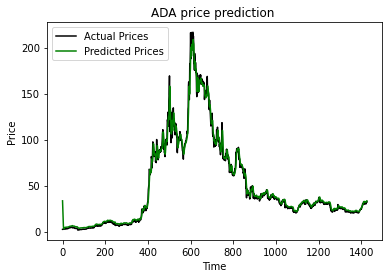

In [21]:
plt.plot(actual_prices,color='black',label='Actual Prices')
plt.plot(prediction_prices,color='green',label='Predicted Prices')
plt.title(f'{crypto_currency} price prediction ')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend(loc='upper left')
plt.show()


In [22]:
# Predict next day

# real_data = [model_inputs[len(model_inputs) + 1 - prediction_days:len(model_inputs real_data = [model_inputs[len(model_inputs) - prediction_days : len(model_inputs)+1, real_data = np.array(real_data)
real_data = model_inputs[len(model_inputs) - prediction_days : len(model_inputs) + 1]
real_data = np.array(real_data)
real_data = np.reshape(real_data, (real_data.shape[0], real_data.shape[1], 1))
prediction = model.predict(real_data)
prediction = scaler.inverse_transform(prediction)

print('{} Price Tomorrow = {} {}'.format(crypto_currency,prediction[0,0],against_currency))


2/2 [==============================] - 1s 0s/step
ADA Price Tomorrow = 30.304855346679688 INR
